<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/18_4_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications import MobileNet
conv_base = MobileNet(include_top=False, input_shape = (150, 150, 3))

<ipython-input-1-e690f561c0d9>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base = MobileNet(include_top=False, input_shape = (150, 150, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
conv_base.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 75, 75, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 75, 75, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 75, 75, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 75, 75, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 75, 75, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 75, 75, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 76, 76, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 37, 37, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 37, 37, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 37, 37, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 37, 37, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 37, 37, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 37, 37, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 37, 37, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [3]:
!wget https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
# Разархивируем датасета во временную папку 'temp'
!unzip -qo "cat-and-dog" -d ./temp

import os

# Набор утилит для работы с файловой системой
import shutil
from keras import layers # импортируем слои
from keras import models # импортируем модели
from keras import optimizers  # импортируем функции оптимизации
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = './temp/training_set/training_set/'

# Папка в которой будем создавать выборки
BASE_DIR = './dataset/'

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# При повторном запуске пересоздаим структуру каталогов
# Если папка существует, то удаляем ее со всеми вложенными каталогами и файлами
if os.path.exists(BASE_DIR):
    shutil.rmtree(BASE_DIR)

# Создаем папку по пути BASE_DIR
os.mkdir(BASE_DIR)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/train'
train_dir = os.path.join(BASE_DIR, 'train')

# Создаем подпапку, используя путь
os.mkdir(train_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/validation'
validation_dir = os.path.join(BASE_DIR, 'validation')

# Создаем подпапку, используя путь
os.mkdir(validation_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/test'
test_dir = os.path.join(BASE_DIR, 'test')

# Создаем подпапку, используя путь
os.mkdir(test_dir)

# Функция создания подвыборок (папок с файлами)
def create_dataset(
    img_path: str,         # Путь к файлам с изображениями классов
    new_path: str,         # Путь к папке с выборками
    class_name: str,       # Имя класса (оно же и имя папки)
    start_index: int,      # Стартовый индекс изображения, с которого начинаем подвыборку
    end_index: int         # Конечный индекс изображения, до которого создаем подвыборку

):

    src_path = os.path.join(img_path, class_name)  # Полный путь к папке с изображениями класса
    dst_path = os.path.join(new_path, class_name)  # Полный путь к папке с новым датасетом класса

    # Получение списка имен файлов с изображениями текущего класса
    class_files = os.listdir(src_path)

    # Создаем подпапку, используя путь
    os.mkdir(dst_path)

    # Перебираем элементы, отобранного списка с начального по конечный индекс
    for fname in class_files[start_index : end_index]:
        # Путь к файлу (источник)
        src = os.path.join(src_path, fname)
        # Новый путь расположения файла (назначение)
        dst = os.path.join(dst_path, fname)
        # Копируем файл из источника в новое место (назначение)
        shutil.copyfile(src, dst)


for class_label in range(CLASS_COUNT):    # Перебор по всем классам по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен

    create_dataset(IMAGE_PATH, train_dir, class_name, 0, 2000)
    create_dataset(IMAGE_PATH, validation_dir, class_name, 2000, 3000)
    create_dataset(IMAGE_PATH, test_dir, class_name, 3000, 4000)

--2024-10-09 15:37:08--  https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228082266 (218M) [application/x-zip-compressed]
Saving to: ‘cat-and-dog.zip’

cat-and-dog.zip     100%[===================>] 217.52M  7.92MB/s    in 34s     

2024-10-09 15:37:44 (6.35 MB/s) - ‘cat-and-dog.zip’ saved [228082266/228082266]



In [18]:
import os                                                 # Для работы с файловой системой
import numpy as np                                        # Работа с матрицами
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Импортируем генератор изображений

datagen = ImageDataGenerator(rescale=1./255) # Задаем генератор и нормализуем данные делением на 255
batch_size = 20 # Размер батча (20 изображений)


# Функция извлечения признаков
def extract_features(directory, sample_count):
    # определяем размерность признаков, заполняем нулями
    features = np.zeros(shape=(sample_count, 4, 4, 1024))
    # определяем размерность выходных меток, заполняем нулями
    labels = np.zeros(shape=(sample_count))

    # генерируем данные из папки
    generator = datagen.flow_from_directory(
        directory,                # путь к папке
        target_size=(150, 150),   # изменить картинки до размера 150 х 150
        batch_size=batch_size,    # размер пакета
        class_mode='binary'       # задача бинарной классификации
    )
    i = 0
    for inputs_batch, labels_batch in generator: # в цикле пошагово генерируем пакет с картинками и пакет из меток
        features_batch = conv_base.predict(inputs_batch, verbose=0) # делаем предсказание на сгенерируемом пакете
        features[i * batch_size : (i + 1) * batch_size] = features_batch # складываем пакеты с признаками пачками в массив с признаками

        labels[i * batch_size : (i + 1) * batch_size] = labels_batch     # складываем пакеты с метками в массив с метками
        i += 1

        if i * batch_size >= sample_count: # Прерываем генерацию, когда выходим за число желаемых примеров
            break

    return features, labels # возвращаем кортеж (признаки, метки)

# Извлекаем (признаки, метки) для обучающей выборки, 2000 образцов
train_features, train_labels = extract_features(train_dir, 4000)

# Извлекаем (признаки, метки) для проверочной выборки, 1000 образцов
validation_features, validation_labels = extract_features(validation_dir, 1000)

# Извлекаем (признаки, метки) для тестовой выборки, 1000 образцов
test_features, test_labels = extract_features(test_dir, 1000)

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [23]:
train_features = np.reshape(train_features, (4000, 4 * 4 * 1024))              # приводим к форме (образцы, 8192) обучающие признаки
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 1024))    # приводим к форме (образцы, 8192) проверочные признаки
test_features = np.reshape(test_features, (1000, 4 * 4 * 1024))                # приводим к форме (образцы, 8192) тестовые признаки

In [27]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

# Обратите внимание на размерность входа
model.add(layers.Input(shape=(4 * 4 * 1024,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5)) # Добавим прореживание для борьбы с переобучением
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='binary_crossentropy',
    metrics=['acc']
)

# Обучаем модель на извлеченных признаках
history = model.fit(
    train_features, train_labels,
    epochs=10,
    batch_size=20,
    validation_data=(validation_features, validation_labels)
)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8531 - loss: 0.4725 - val_acc: 0.9610 - val_loss: 0.0931
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9690 - loss: 0.0877 - val_acc: 0.9620 - val_loss: 0.1052
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9791 - loss: 0.0581 - val_acc: 0.9650 - val_loss: 0.1104
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9865 - loss: 0.0449 - val_acc: 0.9670 - val_loss: 0.0927
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9918 - loss: 0.0320 - val_acc: 0.9600 - val_loss: 0.1317
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9950 - loss: 0.0155 - val_acc: 0.9700 - val_loss: 0.0887
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9952 - loss: 0.0100 - val_acc: 0.9670 - val_loss: 0.1121
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9966 - loss: 0.0105 - val_acc: 0.9650 - val_loss: 0.1077
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

In [28]:
import matplotlib.pyplot as plt

# Рисуем графики
def show_history(store):
    global acc
    global val_acc
    acc = store.history['acc']
    val_acc = store.history['val_acc']
    loss = store.history['loss']
    val_loss = store.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'r', label='Точность на обучающей выборке')
    plt.plot(epochs, val_acc, 'bo', label='Точность на проверочной выборке')
    plt.title('График точности на проверочной и обучающей выборках')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'r', label='Потери на обучающей выборке')
    plt.plot(epochs, val_loss, 'bo', label='Потери на проверочной выборке')
    plt.title('График потерь на проверочной и обучающей выборках')
    plt.legend()
    plt.show()

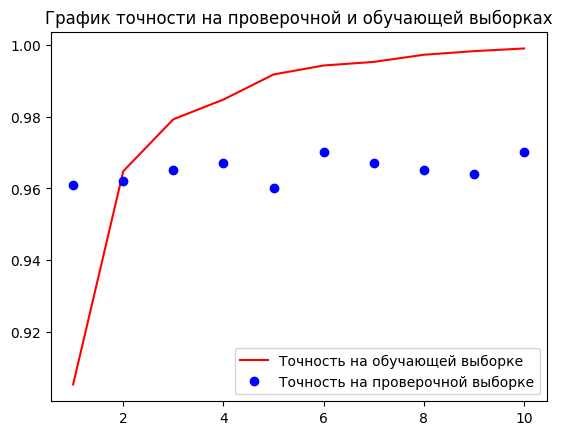

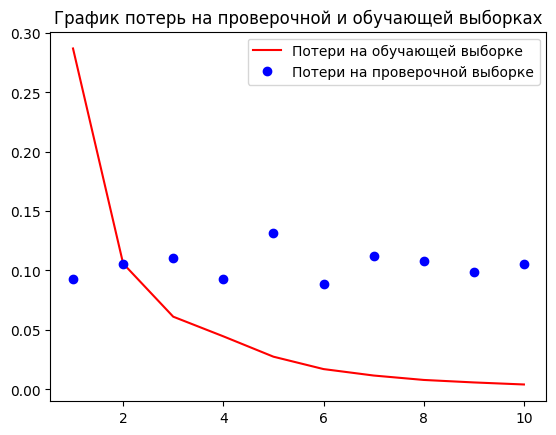

In [29]:
show_history(history)

In [30]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Input(shape=(150, 150, 3)))
model.add(conv_base) # Это просто магия!!!
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 4, 4, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,423,681 (28.32 MB)

 Trainable params: 4,194,817 (16.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [36]:
print('Число обучаемых весов до заморозки:', len(model.trainable_weights))

# замораживаем веса модели
conv_base.trainable = False

print('Число обучаемых весов после заморозки:', len(model.trainable_weights))

Число обучаемых весов до заморозки: 4
Число обучаемых весов после заморозки: 4


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# генератор для обучающей выборки
train_datagen = ImageDataGenerator(
    rescale=1./255,           # нормализация данных
    rotation_range=40,        # поворот 40 градусов
    width_shift_range=0.2,    # смещенние изображения по горизонтали
    height_shift_range=0.2,   # смещенние изображения по вертикали
    shear_range=0.2,          # случайный сдвиг
    zoom_range=0.2,           # случайное масштабирование
    horizontal_flip=True,     # отражение по горизонтали
    fill_mode='nearest'       # стратегия заполнения пустых пикселей при трансформации
)
# генератор для проверочной выборки
test_datagen = ImageDataGenerator(rescale=1./255)

# генерация картинок из папки для обучающей выборки
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

# генерация картинок из папки для проверочной выборки
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

# компиляция модели
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    metrics=['acc']
)

# обучаем модель
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 163ms/step - acc: 0.9559 - loss: 0.1128 - val_acc: 0.9670 - val_loss: 0.0983
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 158ms/step - acc: 0.9520 - loss: 0.1191 - val_acc: 0.9735 - val_loss: 0.0755
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 157ms/step - acc: 0.9572 - loss: 0.1079 - val_acc: 0.9725 - val_loss: 0.0741
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 146ms/step - acc: 0.9570 - loss: 0.1166 - val_acc: 0.9750 - val_loss: 0.0737
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 31s 151ms/step - acc: 0.9630 - loss: 0.0991 - val_acc: 0.9730 - val_loss: 0.0755
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 43s 158ms/step - acc: 0.9627 - loss: 0.0973 - val_acc: 0.9695 - val_loss: 0.0891
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 157ms/step - acc: 0.9685 - loss: 0.0864 - val_acc: 0.9720 - val_loss: 0.0822
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 144ms/step - acc: 0.9674 

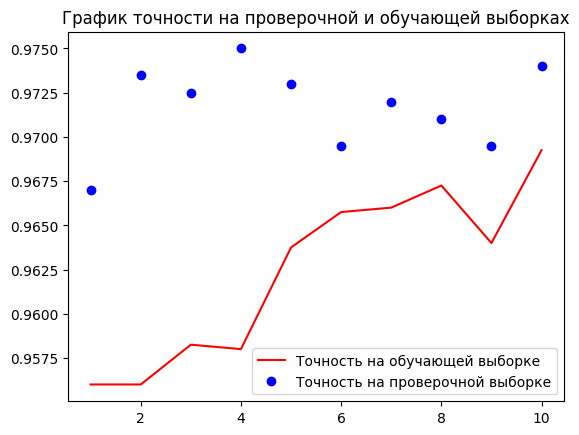

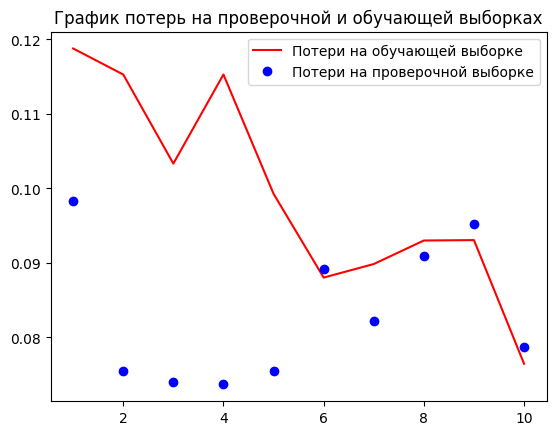

In [39]:
show_history(history)

In [40]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)

Found 2000 images belonging to 2 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.9816 - loss: 0.0926
